In [11]:
def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)
import cv2
import numpy as np
import dlib
bright = 255
contrast = 127
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     kernel = np.ones((5,5),np.float32)/25
#     frame = cv2.filter2D(frame,-1,kernel)
    frame = cv2.bilateralFilter(frame, 3, 175, 175)
    faces = detector(frame)
    #print(faces)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
        #print(face)
        landmarks = predictor(frame, face)
        l=[]
        for n in range(36, 48):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            l.append((x,y))
            #cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)
    leye=l[0:6]
    reye=l[6:12]
    leye=np.array(leye)
    reye=np.array(reye)
        #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
#     arl=eye_aspect_ratio(leye)
    leye=np.array(leye)
    reye=np.array(reye)
        #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
#     arl=eye_aspect_ratio(leye)

#     arr=eye_aspect_ratio(reye)
#     arr=eye_aspect_ratio(reye)
    leftEyeHull = cv2.convexHull(leye)
    rightEyeHull = cv2.convexHull(reye)
    #print(rightEyeHull.shape)
#     cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
#     cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
#     cv2.fillPoly(frame, pts =[leftEyeHull], color=(0,0,0))
#     cv2.fillPoly(frame, pts =[rightEyeHull], color=(0,0,0))
    mask = np.zeros(frame.shape, dtype=frame.dtype)  
#     cv2.fillConvexPoly(mask, np.int32(leftEyeHull), (255, 255, 255));
#     cv2.fillConvexPoly(mask, np.int32(rightEyeHull), (255, 255, 255));
    M1 = cv2.moments(leftEyeHull)
    cX1 = int(M1["m10"] / M1["m00"])
    cY1 = int(M1["m01"] / M1["m00"])
    M2 = cv2.moments(rightEyeHull)
    cX2 = int(M2["m10"] / M2["m00"])
    cY2 = int(M2["m01"] / M2["m00"])
    center1=(cX1,cY1)

    center2=(cX2,cY2)
    src = cv2.imread('shi.jpg')
    src = cv2.bilateralFilter(src, 3, 175, 175)
    src_mask = np.zeros(src.shape, src.dtype)

    poly = np.array([ [99,117], [103,97], [111,86], [137,80], [165,84], [184,99], [192,117],[188,150],[164,165],[132,164],[119,154],[106,144]], np.int32)
    src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

    src_mask2 = np.zeros(src.shape, src.dtype)
    poly2 = np.array([ [323,128], [336,95], [347,86], [370,78], [397,84],[411,100], [413,133],[397,152] ,[368,164],[345,159],[330,143]], np.int32)
    src_mask2 = cv2.fillPoly(src_mask2, [poly2], (255, 255, 255))


    scale_percent = 40 # percent of original size
    width = int(src.shape[1] * scale_percent / 100)
    height = int(src.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
    src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)
    src_mask2 = cv2.resize(src_mask2, dim, interpolation = cv2.INTER_AREA)
   # cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
    output = cv2.seamlessClone(src,frame , src_mask, center1, cv2.NORMAL_CLONE)

    output=cv2.seamlessClone(src, output, src_mask2, center2, cv2.NORMAL_CLONE)
    gamma = 1.8                             # change the value here to get different result
    adjusted = adjust_gamma(output, gamma=gamma)


    cv2.imshow('Frame', adjusted)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import dlib
src = cv2.imread('shi.jpg')
src = cv2.bilateralFilter(src, 3, 175, 175)
cv2.imshow('img',src)
src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([ [99,117], [103,97], [111,86], [137,80], [165,84], [184,99], [192,117],[188,150],[164,165],[132,164],[119,154],[106,144]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

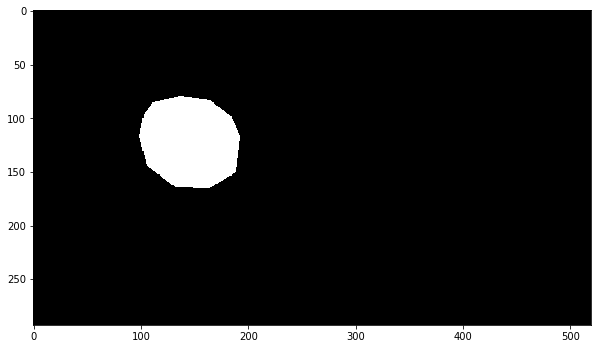

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
plt.imshow(src_mask[:,:,::-1])
plt.show()

In [6]:
src_mask2 = np.zeros(src.shape, src.dtype)
poly2 = np.array([ [323,128], [336,95], [347,86], [370,78], [397,84],[411,100], [413,133],[397,152] ,[368,164],[345,159],[330,143]], np.int32)
src_mask2 = cv2.fillPoly(src_mask2, [poly2], (255, 255, 255))

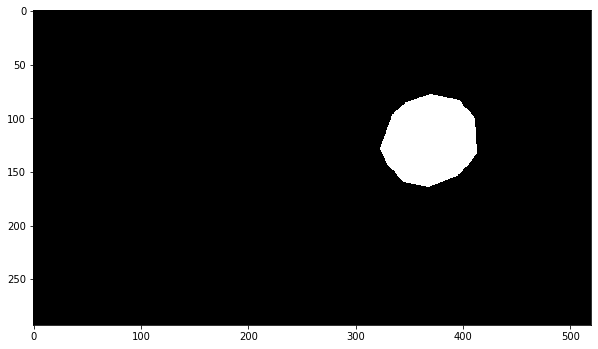

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
plt.imshow(src_mask2[:,:,::-1])
plt.show()

In [1]:

# Python program to explain cv2.circle() method  
    
# importing cv2  
import cv2  
    
# path  
#path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'
    
# Reading an image in default mode 
image = cv2.imread('shi.jpg') 
    
# Window name in which image is displayed 
window_name = 'Image'
   
# Center coordinates 
center_coordinates = (140, 123) 
  
# Radius of circle 
radius = 45
   
# Blue color in BGR 
color = (255, 0, 0) 
   
# Line thickness of 2 px 
thickness = 2
   
# Using cv2.circle() method 
# Draw a circle with blue line borders of thickness of 2 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 
   
# Displaying the image  
cv2.imshow(window_name, image) 
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()